In [1]:
import pandas as pd
import glob
import numpy as np

In [2]:
ned=pd.read_csv('data1/simulatedHouses.csv')
ned.t=pd.to_datetime(ned.t, utc=True)
ned=ned.set_index('t')
ned.index=ned.index.tz_convert("Europe/Rome")
ned

P
t                                      
2013-01-01 01:00:00+01:00  22845.526111
2013-01-01 02:00:00+01:00  21537.773333
2013-01-01 03:00:00+01:00  19939.754167
2013-01-01 04:00:00+01:00  20041.290278
2013-01-01 05:00:00+01:00  17431.244722
...                                 ...
2013-12-30 21:00:00+01:00  37890.072500
2013-12-30 22:00:00+01:00  40931.342500
2013-12-30 23:00:00+01:00  40803.780000
2013-12-31 00:00:00+01:00  52190.309167
2013-12-31 01:00:00+01:00  44847.000000

[8737 rows x 1 columns]

In [3]:
#ned.P=ned.P/40

In [4]:
production=pd.read_csv('production1/100_m_production.csv')
production["Unnamed: 0"]=pd.read_csv('data/greedy_500_v.csv')["Unnamed: 0"].values[3:]
production=production.rename(columns={'Unnamed: 0': "date"})
production=production.set_index("date")
production.index=pd.to_datetime(production.index, utc=True)
production.index=production.index.tz_convert("Europe/Rome")
production=production.resample('1h').mean()
production

greedy_m
date                                  
2013-01-01 08:00:00+01:00  1768.737877
2013-01-01 09:00:00+01:00  1986.692517
2013-01-01 10:00:00+01:00  2243.661245
2013-01-01 11:00:00+01:00  2732.784494
2013-01-01 12:00:00+01:00  3272.411891
...                                ...
2013-12-31 12:00:00+01:00  3333.517635
2013-12-31 13:00:00+01:00  2623.968652
2013-12-31 14:00:00+01:00  2465.819726
2013-12-31 15:00:00+01:00  2171.977106
2013-12-31 16:00:00+01:00  1912.040114

[8745 rows x 1 columns]

In [5]:
merged=ned.join(production)
merged.greedy_m=merged.greedy_m.fillna(0)

In [6]:
merged.difference=merged.greedy_m-merged.P

/home/matteo/anaconda3/envs/pv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [7]:
merged[8:16]

P     greedy_m
t                                                   
2013-01-01 09:00:00+01:00  32798.569722  1986.692517
2013-01-01 10:00:00+01:00  41174.521667  2243.661245
2013-01-01 11:00:00+01:00  51224.817778  2732.784494
2013-01-01 12:00:00+01:00  41094.050833  3272.411891
2013-01-01 13:00:00+01:00  41914.338611  2691.208908
2013-01-01 14:00:00+01:00  42624.824167  2776.427749
2013-01-01 15:00:00+01:00  38323.375000  2057.344287
2013-01-01 16:00:00+01:00  38270.198056  1869.376325

In [8]:
import matplotlib.pyplot as plt

(15706.0, 16070.0)

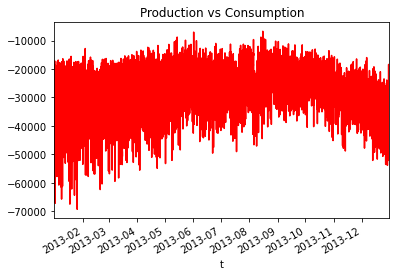

In [9]:
fig, ax = plt.subplots()
merged.difference.where(merged.difference.ge(0), np.nan).plot(kind='line',ax=ax,
                                                              color='green',
                                                              title='Production vs Consumption')
merged.difference.where(merged.difference.le(0), np.nan).plot(kind='line',ax=ax,color='red')

plt.xlim([merged.index[0],merged.index[-1]])

In [10]:
coverage=merged.sum().greedy_m*100/merged.sum().P
print(f"The pv installation is able to cover the {coverage:.1f}")

The pv installation is able to cover the 5.9


In [14]:
merged.greedy_m.sum()/173000


84.84042325980451